In [ ]:
%run ./../../imports.ipynb

In [ ]:
# Define the parameters
a = 2.0
aa = 1.0
# bb = 1.0; cc = 1.0 # nonlinear case
bb = 0.0; cc = 0.0 # linear case

N = 1000

# Define the x and y coordinates
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
x, y = np.meshgrid(x, y)

import math

# Define the functions
u = np.power(x * x + y * y, 1. / 3.) * np.sin((2. * (np.pi / 2. + np.arctan2(y, x))) / 3.)
# u = np.exp(-100 * (x**2 + y**2)) * np.cos(np.pi * x) * np.cos(np.pi * y)
# dux = np.gradient(u, axis=0)
# duy = np.gradient(u, axis=1)
# dux = (2 * (x * np.sin(1/3 * (2 * np.arctan2(y, x) + np.pi)) + y * np.cos(1/3 * (2 * np.arctan2(y, x) + np.pi)))) / (3 * (x**2 + y**2)**(2/3))
dux = (2 * (y * np.cos((np.pi + 2 * np.arctan2(y, x)) / 3) - x * np.sin((np.pi + 2 * np.arctan2(y, x)) / 3))) / (-3 * np.power(np.power(x, 2) + np.power(y, 2), 2.0 / 3.0))
# duy = (-2 * (x * np.cos((np.pi + 2 * np.arctan2(y, x)) / 3) - y * np.sin((np.pi + 2 * np.arctan2(y, x)) / 3))) / (3 * (x**2 + y**2)**(2/3))
duy = -2 * (x * np.cos((np.pi + 2 * np.arctan2(y, x)) / 3) + y * np.sin((np.pi + 2 * np.arctan2(y, x)) / 3)) / (-3 * np.power(np.power(x, 2) + np.power(y, 2), 2.0 / 3.0))
k = aa + bb * u + cc * u * u
qx = - dux * k
qy = - duy * k


# Calculate f
f = np.gradient(qx, axis=0) + np.gradient(qy, axis=1)


In [ ]:
def plot_common(data, cbar_label, cmap, fig_name, save_png=False, save_pdf=True, save_svg=True):
    fig = plt.figure()
    figsize = fig.get_size_inches()
    # fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)  # Create 2 subplots
    # img = plt.imshow(data, extent=[0, 1, 0, 1], origin='lower', cmap=cmap)
    N = 1000

    # Create a mask for the region you don't want to plot
    mask = np.full(data.shape, False)
    mask[:N//2 + 1, :N//2 + 1] = True  # Adjust as per your data's range and scale

    # Apply the mask to the data
    masked_data = np.ma.array(data, mask=mask)

    # Calculate the minimum and maximum of the masked data
    vmin = np.min(masked_data)
    vmax = np.max(masked_data)

    # Plot the masked data
    img = plt.imshow(masked_data, extent=[-1, 1, -1, 1], origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)

    data = masked_data
    cbar = plt.colorbar(img)
    cbar.set_label(cbar_label)

    set_colorbar_ticks(cbar, data, 4)
    
    # Add min and max to default ticks 
    ticks = np.append([data.min(), data.max()], cbar.get_ticks() ) 
    
    # Ensure unique values only and within range 
    ticks = np.unique(ticks[(ticks >= data.min()) & (ticks <= data.max())]) 
    
    cbar.set_ticks(ticks) 

    plt.xlabel('x')
    plt.ylabel('y')

    if save_png:
        plt.savefig(fig_name + '.png')
    if save_pdf:
        edge_offset = 0.2
        plt.savefig(fig_name + '.pdf', bbox_inches=Bbox([[0.5, -edge_offset], [figsize[0] + edge_offset, figsize[1] -edge_offset]]))
    if save_svg:
        plt.savefig(fig_name + '.svg')
    plt.show()

def plot_data(data, cbar_label, data_name, cmap='viridis', c=0.0, save_png=False, save_pdf=True, save_svg=True):
    fig_name = 'analytical_mixed_L_' + data_name
    # fig_name = 'analytical_sincos_linear_' + data_name if c == 0.0 else 'analytical_sincos_nonlinear_' + data_name
    plot_common(data, cbar_label, cmap, fig_name, save_png, save_pdf, save_svg)

def plot_data_zero_white(data, cbar_label, data_name, min_color='black', max_color='red', c=0.0, save_png=False, save_pdf=True, save_svg=True):
    # Convert color names to RGB
    min_color_rgb = mcolors.to_rgb(min_color)
    max_color_rgb = mcolors.to_rgb(max_color)

    # Create a colormap that goes through white at zero
    min_val = data.min()
    max_val = data.max()

    # Create a dictionary for the LinearSegmentedColormap
    cdict = {'red':   [(0.0,  min_color_rgb[0], min_color_rgb[0]),
                       (abs(min_val)/(max_val-min_val),  1.0, 1.0),
                       (1.0,  max_color_rgb[0], max_color_rgb[0])],

             'green': [(0.0,  min_color_rgb[1], min_color_rgb[1]),
                       (abs(min_val)/(max_val-min_val), 1.0, 1.0),
                       (1.0,  max_color_rgb[1], max_color_rgb[1])],

             'blue':  [(0.0,  min_color_rgb[2], min_color_rgb[2]),
                       (abs(min_val)/(max_val-min_val),  1.0, 1.0),
                       (1.0,  max_color_rgb[2], max_color_rgb[2])]}

    cmap = mcolors.LinearSegmentedColormap('my_colormap', cdict, 256)

    fig_name = 'analytical_mixed_L_' + data_name
    # fig_name = 'analytical_sincos_linear_' + data_name if c == 0.0 else 'analytical_sincos_nonlinear_' + data_name
    plot_common(data, cbar_label, cmap, fig_name, save_png, save_pdf, save_svg)

# plotting the data
plot_data(u, label_temperature, 'u', color_temperature, c=cc)
plot_data(dux, label_gradient_partial_x, 'dux', color_gradient, c=cc)
plot_data(duy, label_gradient_partial_y, 'duy', color_gradient, c=cc)
plot_data(qx, label_flux_x, 'qx', color_flux, c=cc)
plot_data(qy, label_flux_y, 'qy', color_flux, c=cc)
# plot_data_zero_white(f, label_source, 'f', color_source_min, color_source_max, c=cc)

if cc != 0.0:
    plot_data(k, label_conductivity, 'k', color_conductivity, c=cc)

In [ ]:
if cc != 0.0:
    N = 500
    T = np.linspace(-1, 1, N)
    k_T = 1 + T + T**2
    plt.scatter(T, k_T, c=k_T, cmap=plt.get_cmap(color_conductivity))

    plt.xlabel(label_temperature)
    plt.ylabel(label_conductivity)

    plt.ylim(0.5, 3.5)

    plt.text(T[N//2] + 0.05, k_T[N//2], r'$k = 1 + T + T^{2}$', horizontalalignment='left', verticalalignment='top')

    plt.tight_layout()

    fig_name = 'analytical_sincos_nonlinear_conductivity_line'
    # plt.savefig(fig_name + '.png')
    plt.savefig(fig_name + '.pdf')
    plt.savefig(fig_name + '.svg')

    plt.show()

In [ ]:
# # data = f

# # Use the plot_data_zero_white function to create a colormap
# min_color='black'
# max_color='red'
# min_color_rgb = mcolors.to_rgb(min_color)
# max_color_rgb = mcolors.to_rgb(max_color)
# min_val = f.min()
# max_val = f.max()
# cdict = {'red':   [(0.0,  min_color_rgb[0], min_color_rgb[0]),
#                    (abs(min_val)/(max_val-min_val),  1.0, 1.0),
#                    (1.0,  max_color_rgb[0], max_color_rgb[0])],

#          'green': [(0.0,  min_color_rgb[1], min_color_rgb[1]),
#                    (abs(min_val)/(max_val-min_val), 1.0, 1.0),
#                    (1.0,  max_color_rgb[1], max_color_rgb[1])],

#          'blue':  [(0.0,  min_color_rgb[2], min_color_rgb[2]),
#                    (abs(min_val)/(max_val-min_val),  1.0, 1.0),
#                    (1.0,  max_color_rgb[2], max_color_rgb[2])]}
# cmap = mcolors.LinearSegmentedColormap('my_colormap', cdict, 256)

# # Create the 3D plot
# fig = plt.figure()
# figsize = fig.get_size_inches()
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_trisurf(x.flatten(), y.flatten(), f.flatten(), cmap=cmap, linewidth=0, antialiased=False)

# # Add a color bar which maps values to colors.
# # cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)
# cbar = fig.colorbar(surf)

# set_colorbar_ticks(cbar, f, 4, add_min_max=True)

# cbar.set_label(label_source)

# ax.set_xlabel('x')
# ax.set_ylabel('y')
# # ax.set_zlabel('f')

# # Remove y-axis values but keep the label
# ax.set_zticklabels([])

# # Set the color of the gridlines
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,1)  # white color
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,1)  # white color
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,1)  # white color

# fig_name = 'analytical_mixed_L_3D_f'

# # plt.savefig(fig_name + '.png')
# edge_offset = 0.2
# plt.savefig(fig_name + '.pdf', bbox_inches=Bbox([[0.5, -edge_offset], [figsize[0] + edge_offset, figsize[1] -edge_offset]]))
# plt.savefig(fig_name + '.svg')

# plt.show()

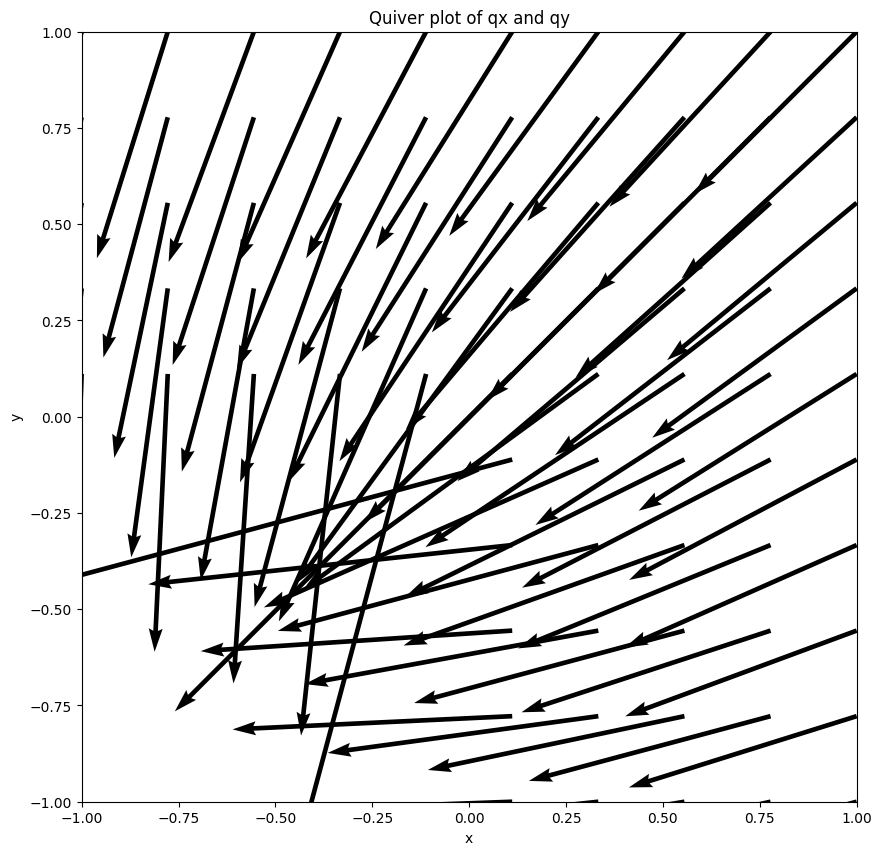

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
a = 2.0
aa = 1.0
# bb = 1.0; cc = 1.0 # nonlinear case
bb = 0.0; cc = 0.0 # linear case

N = 100

# Define the x and y coordinates
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
x, y = np.meshgrid(x, y)

# Define the functions
u = np.power(x * x + y * y, 1. / 3.) * np.sin((2. * (np.pi / 2. + np.arctan2(y, x))) / 3.)
dux = (2 * (y * np.cos((np.pi + 2 * np.arctan2(y, x)) / 3) - x * np.sin((np.pi + 2 * np.arctan2(y, x)) / 3))) / (-3 * np.power(np.power(x, 2) + np.power(y, 2), 2.0 / 3.0))
duy = -2 * (x * np.cos((np.pi + 2 * np.arctan2(y, x)) / 3) + y * np.sin((np.pi + 2 * np.arctan2(y, x)) / 3)) / (-3 * np.power(np.power(x, 2) + np.power(y, 2), 2.0 / 3.0))
k = aa + bb * u + cc * u * u
qx = - dux * k
qy = - duy * k

# Mask the bottom left square
mask = (x < 0) & (y < 0)
qx = np.ma.masked_where(mask, qx)
qy = np.ma.masked_where(mask, qy)

# Plot qx and qy as glyphs
plt.figure(figsize=(10, 10))
plt.quiver(x, y, qx, qy, scale=1, scale_units='xy')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quiver plot of qx and qy')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()